In [1]:
from utils.load_dataset import *
from utils.custom_utils import *

In [2]:
valid = load_real_valid(real_valid_txt)
test_df = load_testing(test_txt)

valid_dataset = FallenPeople(valid, f'{REAL_DATASET}/valid', FallenPeople.valid_test_transform())
test_dataset = FallenPeople(test_df, TESTING, FallenPeople.valid_test_transform())

In [3]:
model, device = load_saved_model("./models/fasterrcnn_resnet50_fallen_people_vi_real_v1_2021_12_021706.pth")
test_list = [random.randint(0,len(test_df['img_path'].unique())-1) for i in range(5)]
f = open(filename("txt","results/virtual_and_real_fixed_"),"a")

In [14]:
f = open(filename("txt","results/virtual_and_real_fixed_"),"a")

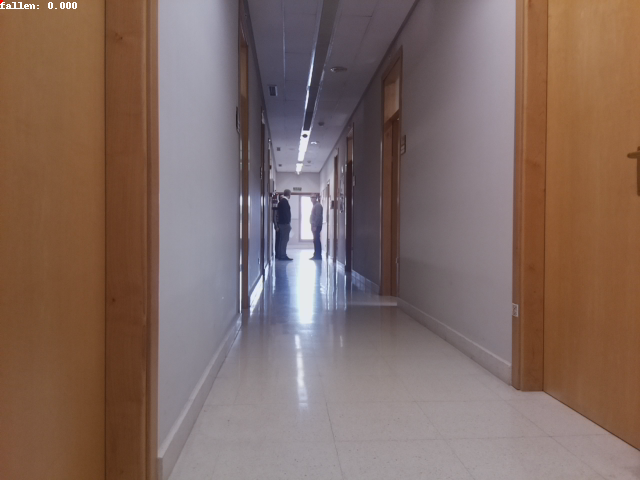

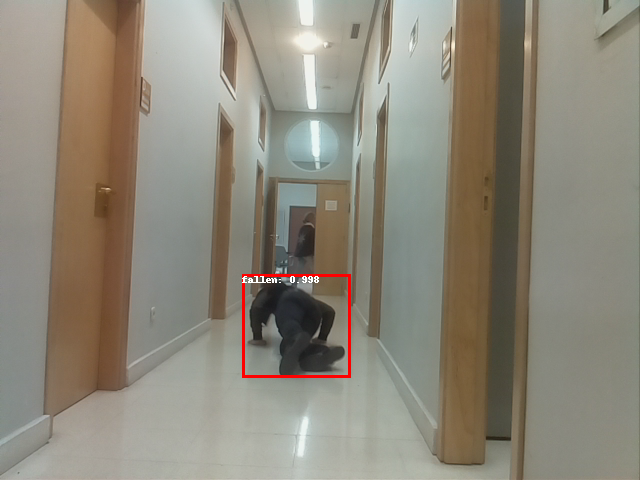

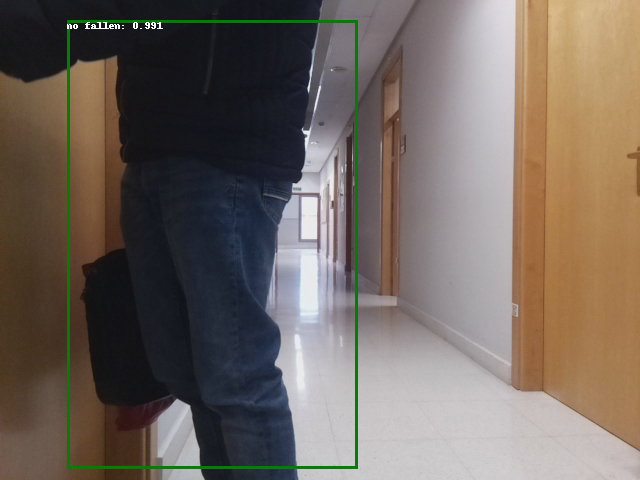

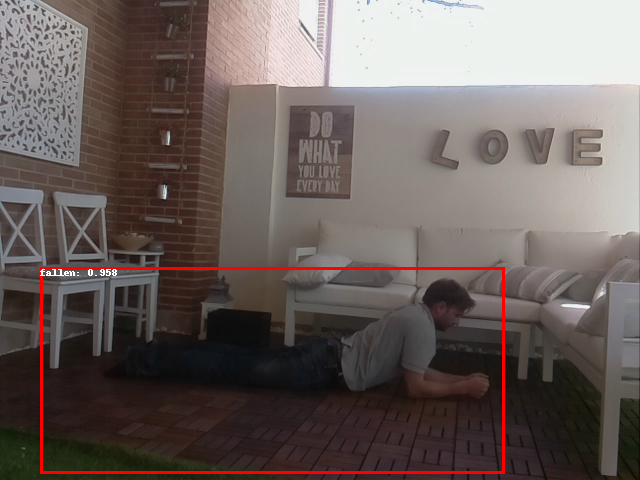

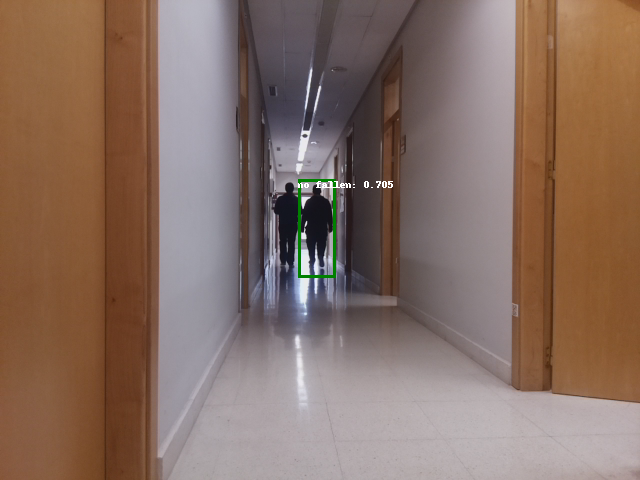

In [4]:
visualize_prediction(test_dataset, test_list, model, device)

In [15]:
title = "==== TEST RESULT ====\n"
f.write(title)

22

In [16]:
accuracy, tn, tp, fn, fp = classifier_performance(test_dataset, model, device)

  0%|          | 0/959 [00:00<?, ?it/s]

In [17]:
conf_matrix = [["POSITIVE",f"TP: {tp}",f"FP: {fp}"],["NEGATIVE",f"FN: {fn}",f"TN: {tn}"]]
recall = tp / (tp+fn)
precision = tp/ (tp+fp)
f1_score = 2/((1/recall)+(1/precision))
print(tabulate(conf_matrix, headers=["","POSITIVE","NEGATIVE"], tablefmt="github"))
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-score: {f1_score:.2f}")

f.write(tabulate(conf_matrix, headers=["","POSITIVE","NEGATIVE"], tablefmt="github"))
f.write(f"\nAccuracy: {accuracy:.2f}\n")
f.write(f"Recall: {recall:.2f}\n")
f.write(f"Precision: {precision:.2f}\n")
f.write(f"F1-score: {f1_score:.2f}\n")

|          | POSITIVE   | NEGATIVE   |
|----------|------------|------------|
| POSITIVE | TP: 369    | FP: 207    |
| NEGATIVE | FN: 15     | TN: 368    |
Accuracy: 0.77
Recall: 0.96
Precision: 0.64
F1-score: 0.77


15

# VALIDATION

In [8]:
valid_list = [random.randint(0,len(valid['img_path'].unique())-1) for i in range(5)]

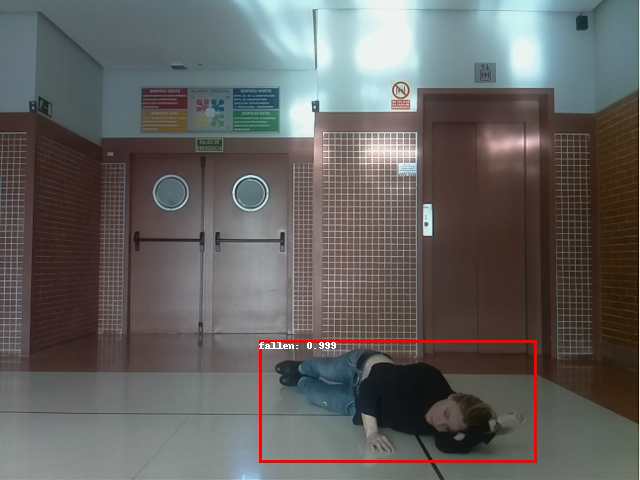

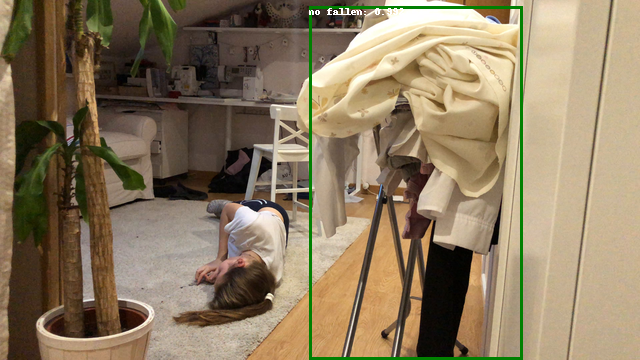

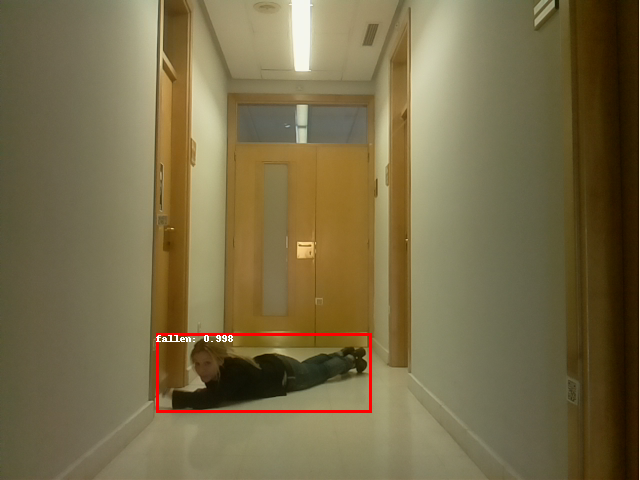

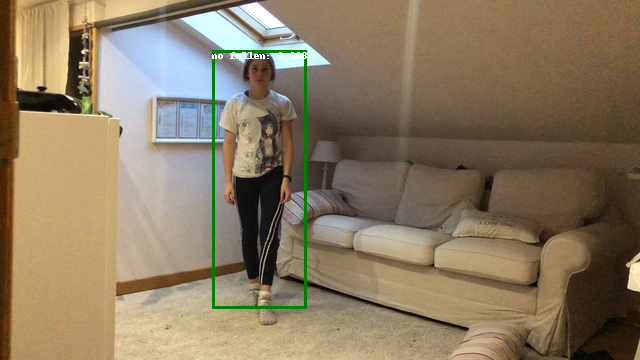

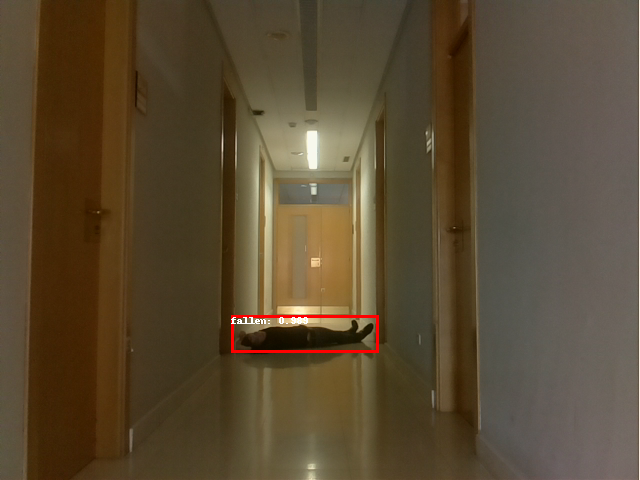

In [9]:
visualize_prediction(valid_dataset, valid_list, model, device)

In [18]:
title_valid = "\n==== VALID RESULT ====\n"
f.write(title_valid)

23

In [19]:
accuracy, tn, tp, fn, fp = classifier_performance(valid_dataset, model, device)

  0%|          | 0/1174 [00:00<?, ?it/s]

In [21]:
conf_matrix = [["POSITIVE",f"TP: {tp}",f"FP: {fp}"],["NEGATIVE",f"FN: {fn}",f"TN: {tn}"]]
recall = tp / (tp+fn)
precision = tp/ (tp+fp)
f1_score = 2/((1/recall)+(1/precision))
print(tabulate(conf_matrix, headers=["","POSITIVE","NEGATIVE"], tablefmt="github"))
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f} ")
print(f"F1-score: {f1_score:.2f}")

f.write(tabulate(conf_matrix, headers=["","POSITIVE","NEGATIVE"], tablefmt="github"))
f.write(f"\nAccuracy: {accuracy:.2f}\n")
f.write(f"Recall: {recall:.2f}\n")
f.write(f"Precision: {precision:.2f}\n")
f.write(f"F1-score: {f1_score:.2f}\n")
f.close()

|          | POSITIVE   | NEGATIVE   |
|----------|------------|------------|
| POSITIVE | TP: 711    | FP: 92     |
| NEGATIVE | FN: 54     | TN: 317    |
Accuracy: 0.88
Recall: 0.93
Precision: 0.89 
F1-score: 0.91


ValueError: I/O operation on closed file.